In [1]:
import pandas as pd 
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,loan_amount,num_login_sessions,credit_score,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,account_diversity_index,age,annual_income,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,available_credit,loan_to_annual_income,monthly_free_cash_flow,default
0,0,17700.0,13,696,22.8,273.6,169100.0,0.499,41,61800.0,5150.00,738.64,592.13,0.258,0.258402,0.115,26886.9,0.286408,3819.230000,0
1,1,114000.0,6,659,3.5,42.0,78200.0,0.298,38,28600.0,2383.33,392.21,1013.86,0.590,0.589959,0.425,2267.8,3.986014,977.260000,1
2,2,9300.0,1,662,0.0,0.0,41400.0,0.174,18,20700.0,1725.00,204.07,317.81,0.303,0.302539,0.184,19085.4,0.449275,1203.120000,0
3,3,8700.0,4,676,9.0,108.0,60000.0,0.263,27,31400.0,2616.67,288.71,234.52,0.200,0.199961,0.090,51180.0,0.277070,2093.436667,0
4,4,7200.0,6,678,8.0,96.0,49700.0,0.298,26,24600.0,2050.00,248.77,334.81,0.285,0.284673,0.163,25446.4,0.292683,1466.420000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 89999 non-null  int64  
 1   loan_amount                89999 non-null  float64
 2   num_login_sessions         89999 non-null  int64  
 3   credit_score               89999 non-null  int64  
 4   oldest_credit_line_age     89999 non-null  float64
 5   oldest_account_age_months  89999 non-null  float64
 6   total_credit_limit         89999 non-null  float64
 7   account_diversity_index    89999 non-null  float64
 8   age                        89999 non-null  int64  
 9   annual_income              89999 non-null  float64
 10  monthly_income             89999 non-null  float64
 11  existing_monthly_debt      89999 non-null  float64
 12  monthly_payment            89999 non-null  float64
 13  debt_to_income_ratio       89999 non-null  flo

In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,loan_amount,num_login_sessions,credit_score,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,account_diversity_index,age,annual_income,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,available_credit,loan_to_annual_income,monthly_free_cash_flow,default
0,17700.0,13,696,22.8,273.6,169100.0,0.499,41,61800.0,5150.00,738.64,592.13,0.258,0.258402,0.115,26886.9,0.286408,3819.230000,0
1,114000.0,6,659,3.5,42.0,78200.0,0.298,38,28600.0,2383.33,392.21,1013.86,0.590,0.589959,0.425,2267.8,3.986014,977.260000,1
2,9300.0,1,662,0.0,0.0,41400.0,0.174,18,20700.0,1725.00,204.07,317.81,0.303,0.302539,0.184,19085.4,0.449275,1203.120000,0
3,8700.0,4,676,9.0,108.0,60000.0,0.263,27,31400.0,2616.67,288.71,234.52,0.200,0.199961,0.090,51180.0,0.277070,2093.436667,0
4,7200.0,6,678,8.0,96.0,49700.0,0.298,26,24600.0,2050.00,248.77,334.81,0.285,0.284673,0.163,25446.4,0.292683,1466.420000,0


In [5]:
from sklearn.utils import resample

# 1-class (minority)
df_minority = df[df['default'] == 1]

# 0-class (majority)
df_majority = df[df['default'] == 0]

# Majority-ni undersample qilish
df_majority_downsampled = resample(
    df_majority,
    replace=False,          # qayta tanlamasdan
    n_samples=len(df_minority),  # minority soniga teng
    random_state=42
)

# Natija — yangi balanslangan dataset
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shufle qilib qo'yamiz
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced['default'].value_counts()


0    4594
1    4594
Name: default, dtype: int64

In [6]:
df_balanced.corr()['default'].sort_values(ascending=False)

default                      1.000000
debt_to_income_ratio         0.335537
debt_service_ratio           0.335531
payment_to_income_ratio      0.331397
loan_to_annual_income        0.267833
monthly_payment              0.229062
loan_amount                  0.170578
account_diversity_index     -0.182190
oldest_credit_line_age      -0.195563
oldest_account_age_months   -0.195563
num_login_sessions          -0.227790
existing_monthly_debt       -0.252827
available_credit            -0.298320
total_credit_limit          -0.304224
age                         -0.306603
monthly_income              -0.363516
annual_income               -0.363519
monthly_free_cash_flow      -0.401089
credit_score                -0.407288
Name: default, dtype: float64

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'num_login_sessions'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'oldest_credit_line_age'}>],
       [<Axes: title={'center': 'oldest_account_age_months'}>,
        <Axes: title={'center': 'total_credit_limit'}>,
        <Axes: title={'center': 'account_diversity_index'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'existing_monthly_debt'}>,
        <Axes: title={'center': 'monthly_payment'}>],
       [<Axes: title={'center': 'debt_to_income_ratio'}>,
        <Axes: title={'center': 'debt_service_ratio'}>,
        <Axes: title={'center': 'payment_to_income_ratio'}>,
        <Axes: title={'center': 'available_credit'}>],
       [<Axes: title={'center': 'loan_to_annual_income'}>,
        <Axes: title={'center': 'monthly_free_cash_flow'}

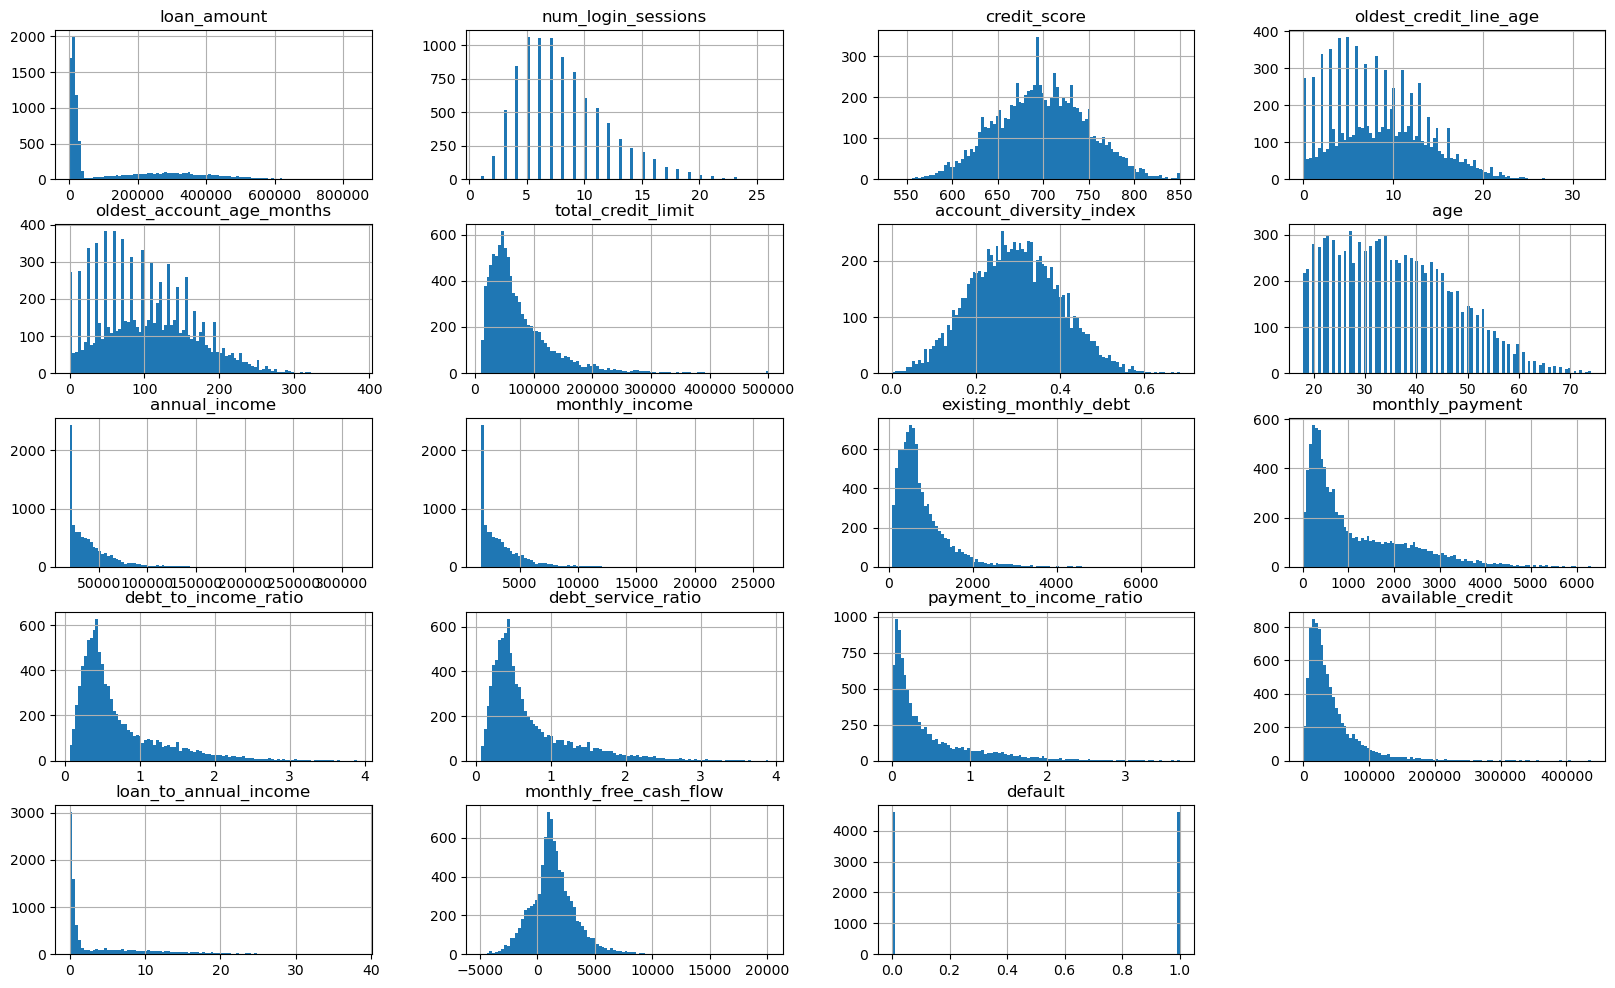

In [7]:
df_balanced.hist(bins=100 , figsize=(20,12))

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn import metrics
SVC_model = SVC()
import seaborn as sns
import matplotlib.pyplot as plt 

In [33]:
X = df_balanced.drop("default", axis=1)
y = df_balanced["default"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
rf = RandomForestClassifier(
    n_estimators=200, 
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

# Train predict
y_train_pred = rf.predict(X_test)

# Classification metrics
print("=== RandomForest Train Classification Report ===")
print(classification_report(y_test, y_train_pred))

=== RandomForest Train Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       919
           1       0.72      0.69      0.70       919

    accuracy                           0.71      1838
   macro avg       0.71      0.71      0.71      1838
weighted avg       0.71      0.71      0.71      1838



              precision    recall  f1-score   support

           0       0.71      0.73      0.72       919
           1       0.72      0.70      0.71       919

    accuracy                           0.71      1838
   macro avg       0.71      0.71      0.71      1838
weighted avg       0.71      0.71      0.71      1838

Model aniqligi: 0.7121871599564744


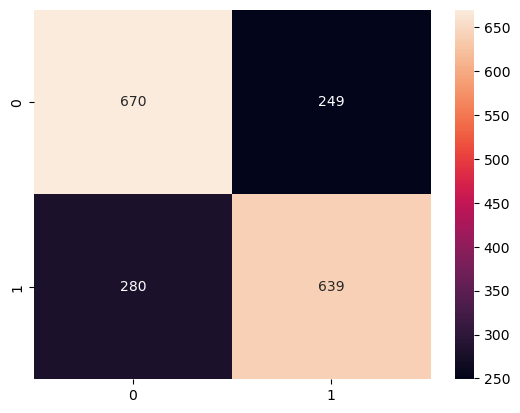

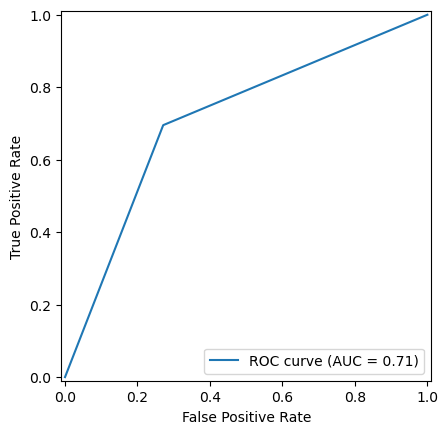

In [36]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))
## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Stacking
Accuracy: 0.7110990206746464
[[673 246]
 [285 634]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       919
           1       0.72      0.69      0.70       919

    accuracy                           0.71      1838
   macro avg       0.71      0.71      0.71      1838
weighted avg       0.71      0.71      0.71      1838



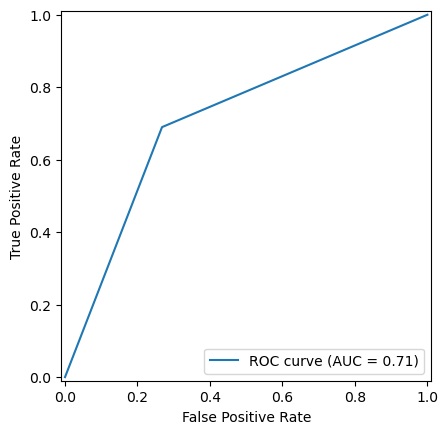

In [38]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
y_pred_prob_stack = stack_model.predict_proba(X_test)[:, 1]

print("Stacking")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_stack)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Eng yaxshi parametrlar
print("Best Params:", grid.best_params_)
print("Best ROC AUC Score (CV):", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 300}
Best ROC AUC Score (CV): 0.7928270627979084


In [40]:
# GridSearchCV dan olingan eng yaxshi parametrlar bilan RandomForest yaratamiz
best_rf = RandomForestClassifier(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    random_state=42
)

# Fit
best_rf.fit(X_train, y_train)

# Predict
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7116430903155604
Test ROC AUC: 0.786871522601683
Confusion Matrix:
 [[672 247]
 [283 636]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       919
           1       0.72      0.69      0.71       919

    accuracy                           0.71      1838
   macro avg       0.71      0.71      0.71      1838
weighted avg       0.71      0.71      0.71      1838

